In [ ]:
# Add ldcpy root to system path
import sys
#sys.path.insert(0,'/Users/abaker/alli/code-repo/ldcpy/')
sys.path.insert(0,'/glade/u/home/abaker/repos/ldcpy/')
                    
# Import ldcpy package
# Autoreloads package everytime the package is called, so changes to code will be reflected in the notebook if the above sys.path.insert(...) line is uncommented.
%load_ext autoreload
%autoreload 2
import ldcpy

#display the plots in this notebook
%matplotlib inline

import warnings
#warnings.filterwarnings('ignore')

In [218]:
# ts_col contains TS data
ts_col = ldcpy.open_datasets("cam-fv",["TS"],['/Users/abaker/alli/code-repo/ldcpy/data/cam-fv/orig.TS.100days.nc', 
                                 '/Users/abaker/alli/code-repo/ldcpy/data/cam-fv/zfp1.0.TS.100days.nc', 
                                 '/Users/abaker/alli/code-repo/ldcpy/data/cam-fv/zfp1e-1.TS.100days.nc',
                                    '/Users/abaker/alli/code-repo/ldcpy/data/cam-fv/zfp1e-3.TS.100days.nc'],
                         ['orig', 'zfp1.0', 'zfp1e-1', 'zfp1e-3'])
# prect_col contains PRECT data
prect_col = ldcpy.open_datasets("cam-fv", ["PRECT"],['/Users/abaker/alli/code-repo/ldcpy/data/cam-fv/orig.PRECT.60days.nc', 
                                     '/Users/abaker/alli/code-repo/ldcpy/data/cam-fv/zfp1e-7.PRECT.60days.nc', 
                                    '/Users/abaker/alli/code-repo/ldcpy/data/cam-fv/zfp1e-9.PRECT.60days.nc', 
                                     '/Users/abaker/alli/code-repo/ldcpy/data/cam-fv/zfp1e-11.PRECT.60days.nc'],
                         ['orig', 'zfp1e-7', 'zfp1e-9', 'zfp1e-11'])
# col_ds3 contains 3D T data (here we specify the chunk to be a single timeslice)
t_col = ldcpy.open_datasets("cam-fv",
    ["T"],
    [
        "/Users/abaker/alli/code-repo/ldcpy/data/cam-fv/cam-fv.T.3months.nc",
        "/Users/abaker/alli/code-repo/ldcpy/data/cam-fv/c.fpzip.cam-fv.T.3months.nc",
    ],
    ["orig", "comp"]
)
precsc_col = ldcpy.open_datasets("cam-fv", ["PRECSC"], 
               ["/Users/abaker/alli/scratch/precsc.orig.nc","/Users/abaker/alli/scratch/t10.b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECSC.20060101-20801231.nc"
               ], ["orig", "comp"])


dataset size in GB 0.09

dataset size in GB 0.05

dataset size in GB 0.04

dataset size in GB 0.01



In [219]:
ds = ts_col.isel(time=10)
ldcpy.compare_stats(ds, "TS", ["orig", "zfp1.0", "zfp1e-1", "zfp1e-3"], include_ssim=True, significant_digits = 6)

orig    zfp1.0   zfp1e-1   zfp1e-3
mean                           285.083   285.074   285.082   285.083
variance                         524.2   523.856   524.178     524.2
standard deviation             22.8954   22.8879   22.8949   22.8954
min value                       213.47   213.496   213.477    213.47
max value                      311.332   311.223   311.324   311.332
probability positive                 1         1         1         1
number of zeros                      0         0         0         0
spatial autocorr - latitude    0.99513  0.995118   0.99513   0.99513
spatial autocorr - longitude  0.997596  0.997587  0.997596  0.997596
entropy estimate              0.413538  0.244624  0.345742  0.412779

zfp1.0      zfp1e-1      zfp1e-3
max abs diff                           0.367096    0.0226746   0.00038147
min abs diff                                  0            0            0
mean abs diff                         0.0561398   0.00419809  6.57536e-05
mean squared diff                   7.87518e-05  2.94014e-07  7.45176e-11
root mean squared diff                0.0724428   0.00529235  8.39991e-05
normalized root mean squared diff   0.000761424  5.42064e-05  8.57007e-07
normalized max pointwise error       0.00375115  0.000228269  3.74211e-06
pearson correlation coefficient        0.999995            1            1
ks p-value                                    1            1            1
spatial relative error(% > 0.0001)      68.8024            0            0
spatial relative error (% > 0.001)      0.18627            0            0
spatial relative error (% > 0.05)             0            0            0
spatial relative error (% > 0.01)             0            0            0
max spatial relative error           0.00149926  7.70975e-05  1.41233e-06
data SSIM                              0.981249      0.99857     0.999985
image SSIM                             0.998325     0.999857     0.999997
SF data SSIM                           0.999663     0.999998            1
Exp. data SSIM                         0.981249      0.99857     0.999985
file size ratio                            1.87         1.28         0.58

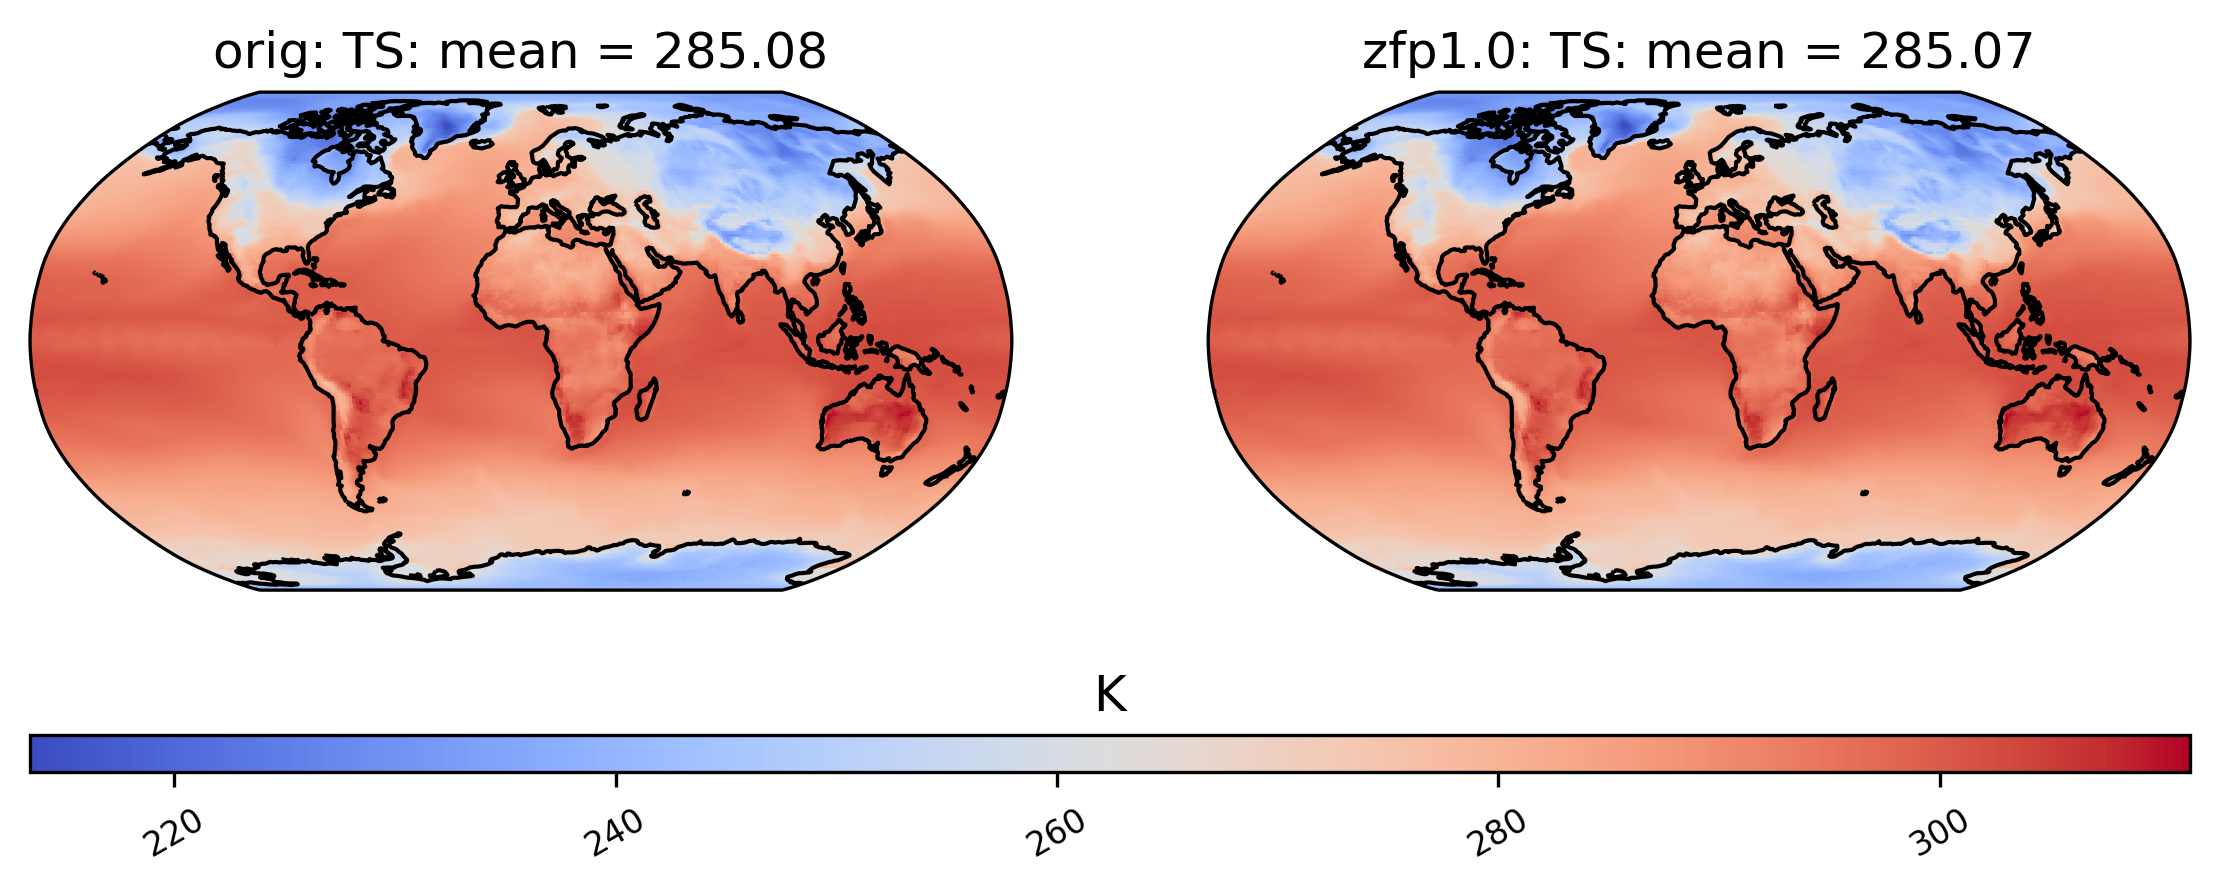

In [220]:
#only time = 10
ldcpy.plot(
    ts_col,
    "TS",
    sets=["orig", "zfp1.0"],
    calc="mean", start = 10, end= 10
)

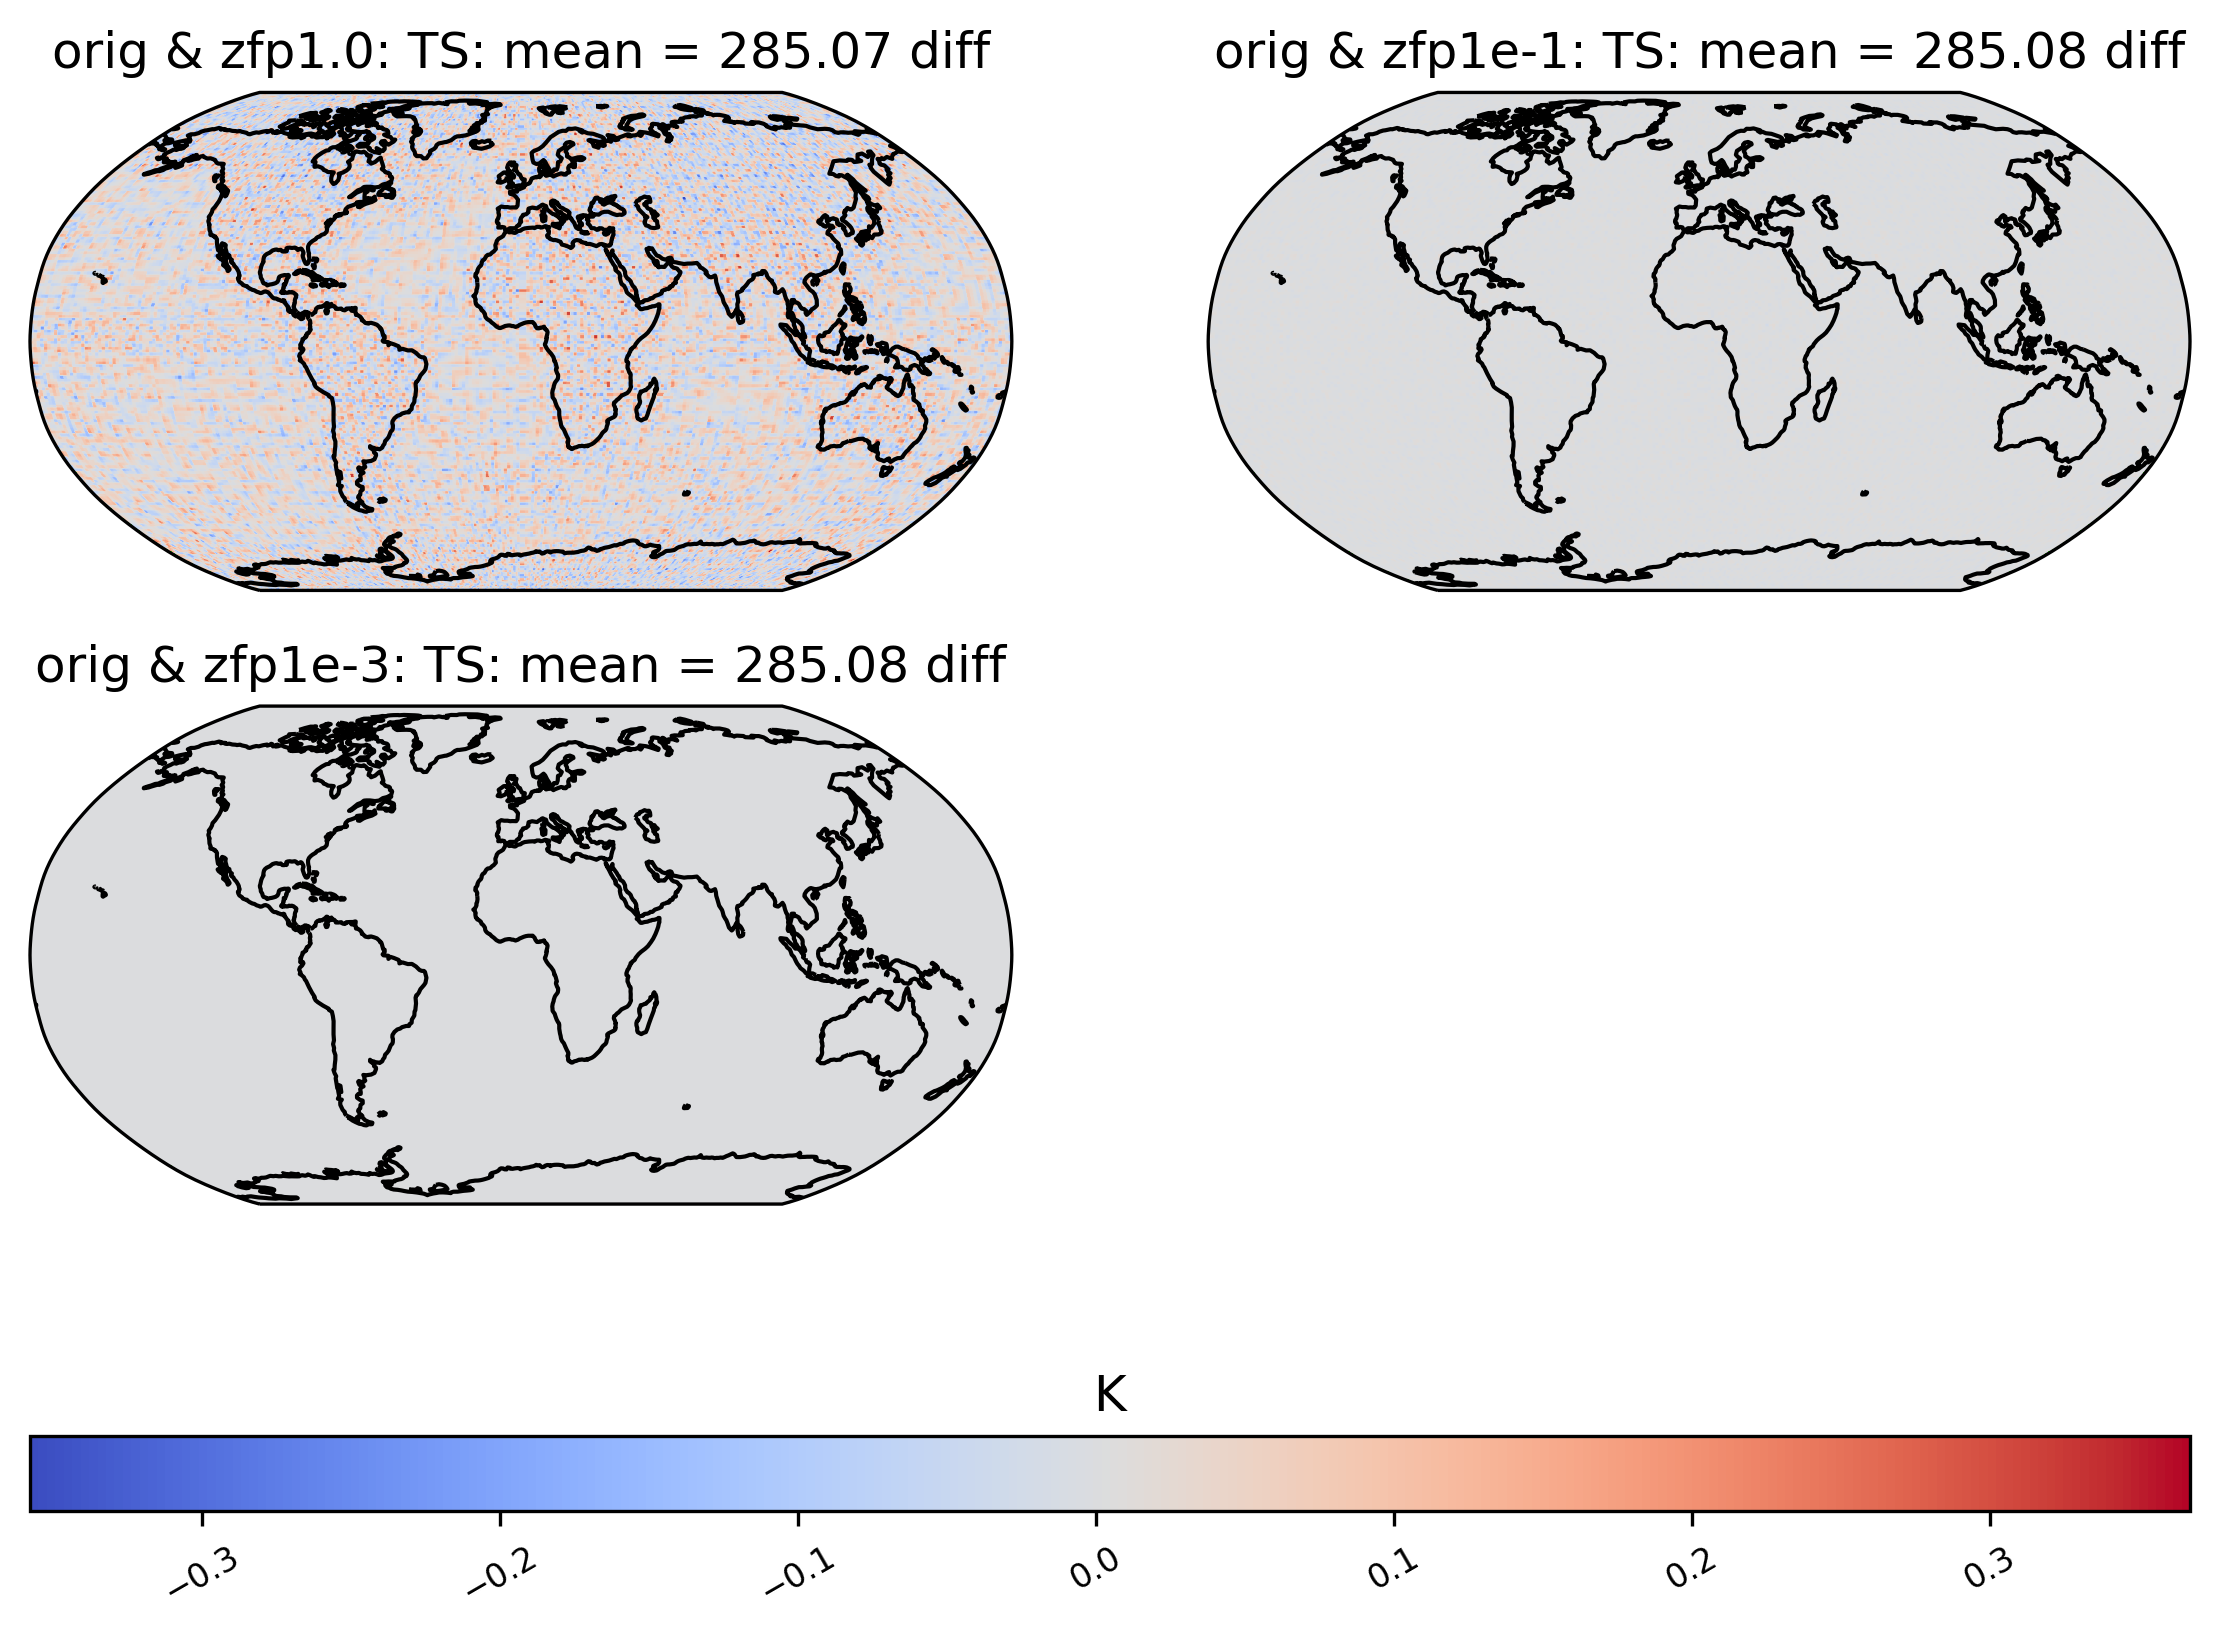

In [221]:
ldcpy.plot(
    ts_col,
    "TS",
    sets=["orig", "zfp1.0", "zfp1e-1", "zfp1e-3"],
    calc="mean",
    calc_type="diff", start = 10, end = 10
)

In [222]:
ds_p = prect_col.isel(time=10)
ldcpy.compare_stats(ds_p, "PRECT", ["orig", "zfp1e-7", "zfp1e-9", "zfp1e-11"], include_ssim=True, significant_digits = 6)

orig       zfp1e-7       zfp1e-9  \
mean                           3.57187e-08   3.57014e-08   3.57184e-08   
variance                       4.81866e-15   4.83811e-15   4.81875e-15   
standard deviation             6.94166e-08   6.95565e-08   6.94172e-08   
min value                     -1.22209e-24  -1.44355e-08  -2.83762e-10   
max value                      2.21571e-06   2.21771e-06   2.21552e-06   
probability positive              0.983905      0.659415        0.8918   
number of zeros                        881         17102          4127   
spatial autocorr - latitude       0.896109      0.894547      0.896108   
spatial autocorr - longitude      0.929385      0.927762      0.929383   
entropy estimate                  0.527936       0.10355      0.286556   

                                  zfp1e-11  
mean                           3.57187e-08  
variance                       4.81866e-15  
standard deviation             6.94166e-08  
min value                     -2.55795e-12  
max value                      2.21571e-06  
probability positive              0.952836  
number of zeros                       1257  
spatial autocorr - latitude       0.896109  
spatial autocorr - longitude      0.929385  
entropy estimate                  0.425438

zfp1e-7       zfp1e-9     zfp1e-11
max abs diff                        2.19793e-08   3.45521e-10  2.84217e-12
min abs diff                                  0             0            0
mean abs diff                       2.61827e-09   6.02246e-11  4.85317e-13
mean squared diff                   2.98228e-22    6.6601e-26  9.98446e-30
root mean squared diff              3.71682e-09   7.79301e-11  6.19196e-13
normalized root mean squared diff    0.00154382   3.40376e-05  2.78997e-07
normalized max pointwise error       0.00976978   0.000155941  1.17569e-06
pearson correlation coefficient         0.99879      0.999999            1
ks p-value                                    0  1.47276e-204  1.27641e-23
spatial relative error(% > 0.0001)      98.3652       95.5838      43.7193
spatial relative error (% > 0.001)      97.9727       79.2553      22.1553
spatial relative error (% > 0.05)       80.1685       28.5156      8.94821
spatial relative error (% > 0.01)        93.873       47.2765      12.3662
max spatial relative error          4.95242e+11   1.48223e+19  2.69238e+17
data SSIM                              0.775449      0.990894     0.999919
image SSIM                             0.996012      0.999919     0.999999
SF data SSIM                            0.99731      0.999999            1
Exp. data SSIM                         0.775449      0.990894     0.999919
file size ratio                            4.22          1.83         1.24

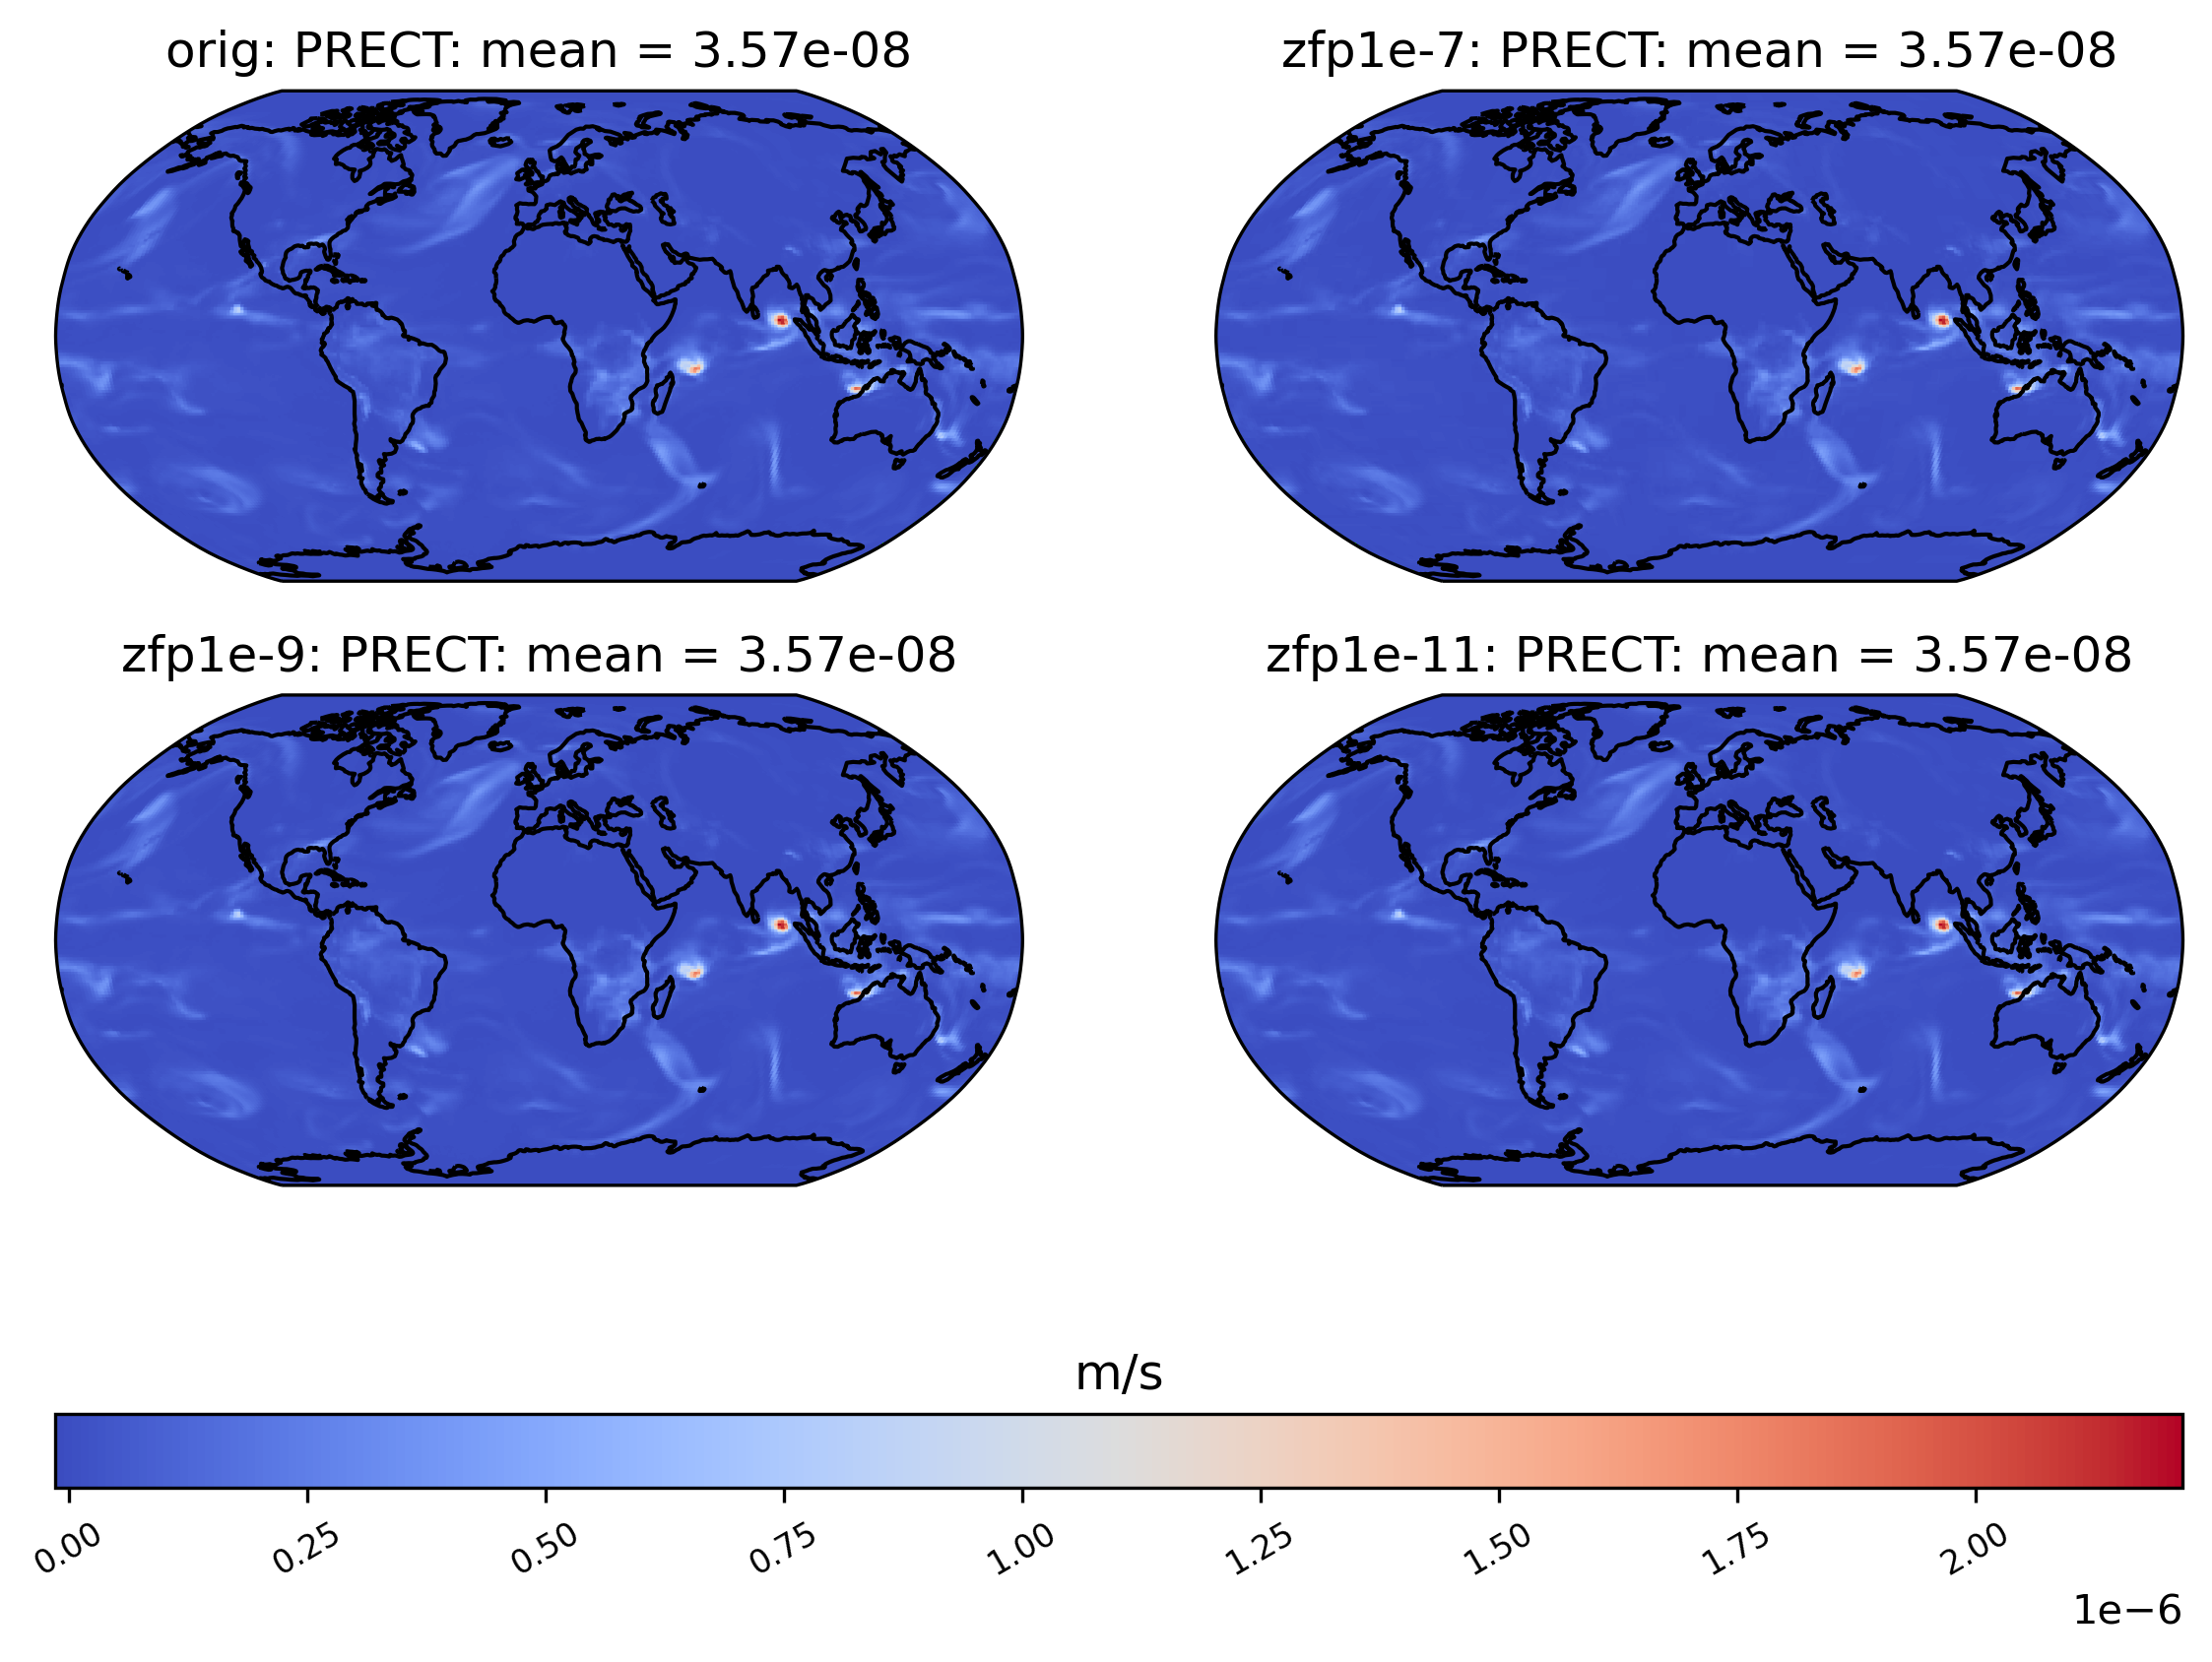

In [223]:
ldcpy.plot(
    prect_col,
    "PRECT",
    sets=["orig", "zfp1e-7", "zfp1e-9", "zfp1e-11"],
    calc="mean", start = 10, end = 10
)

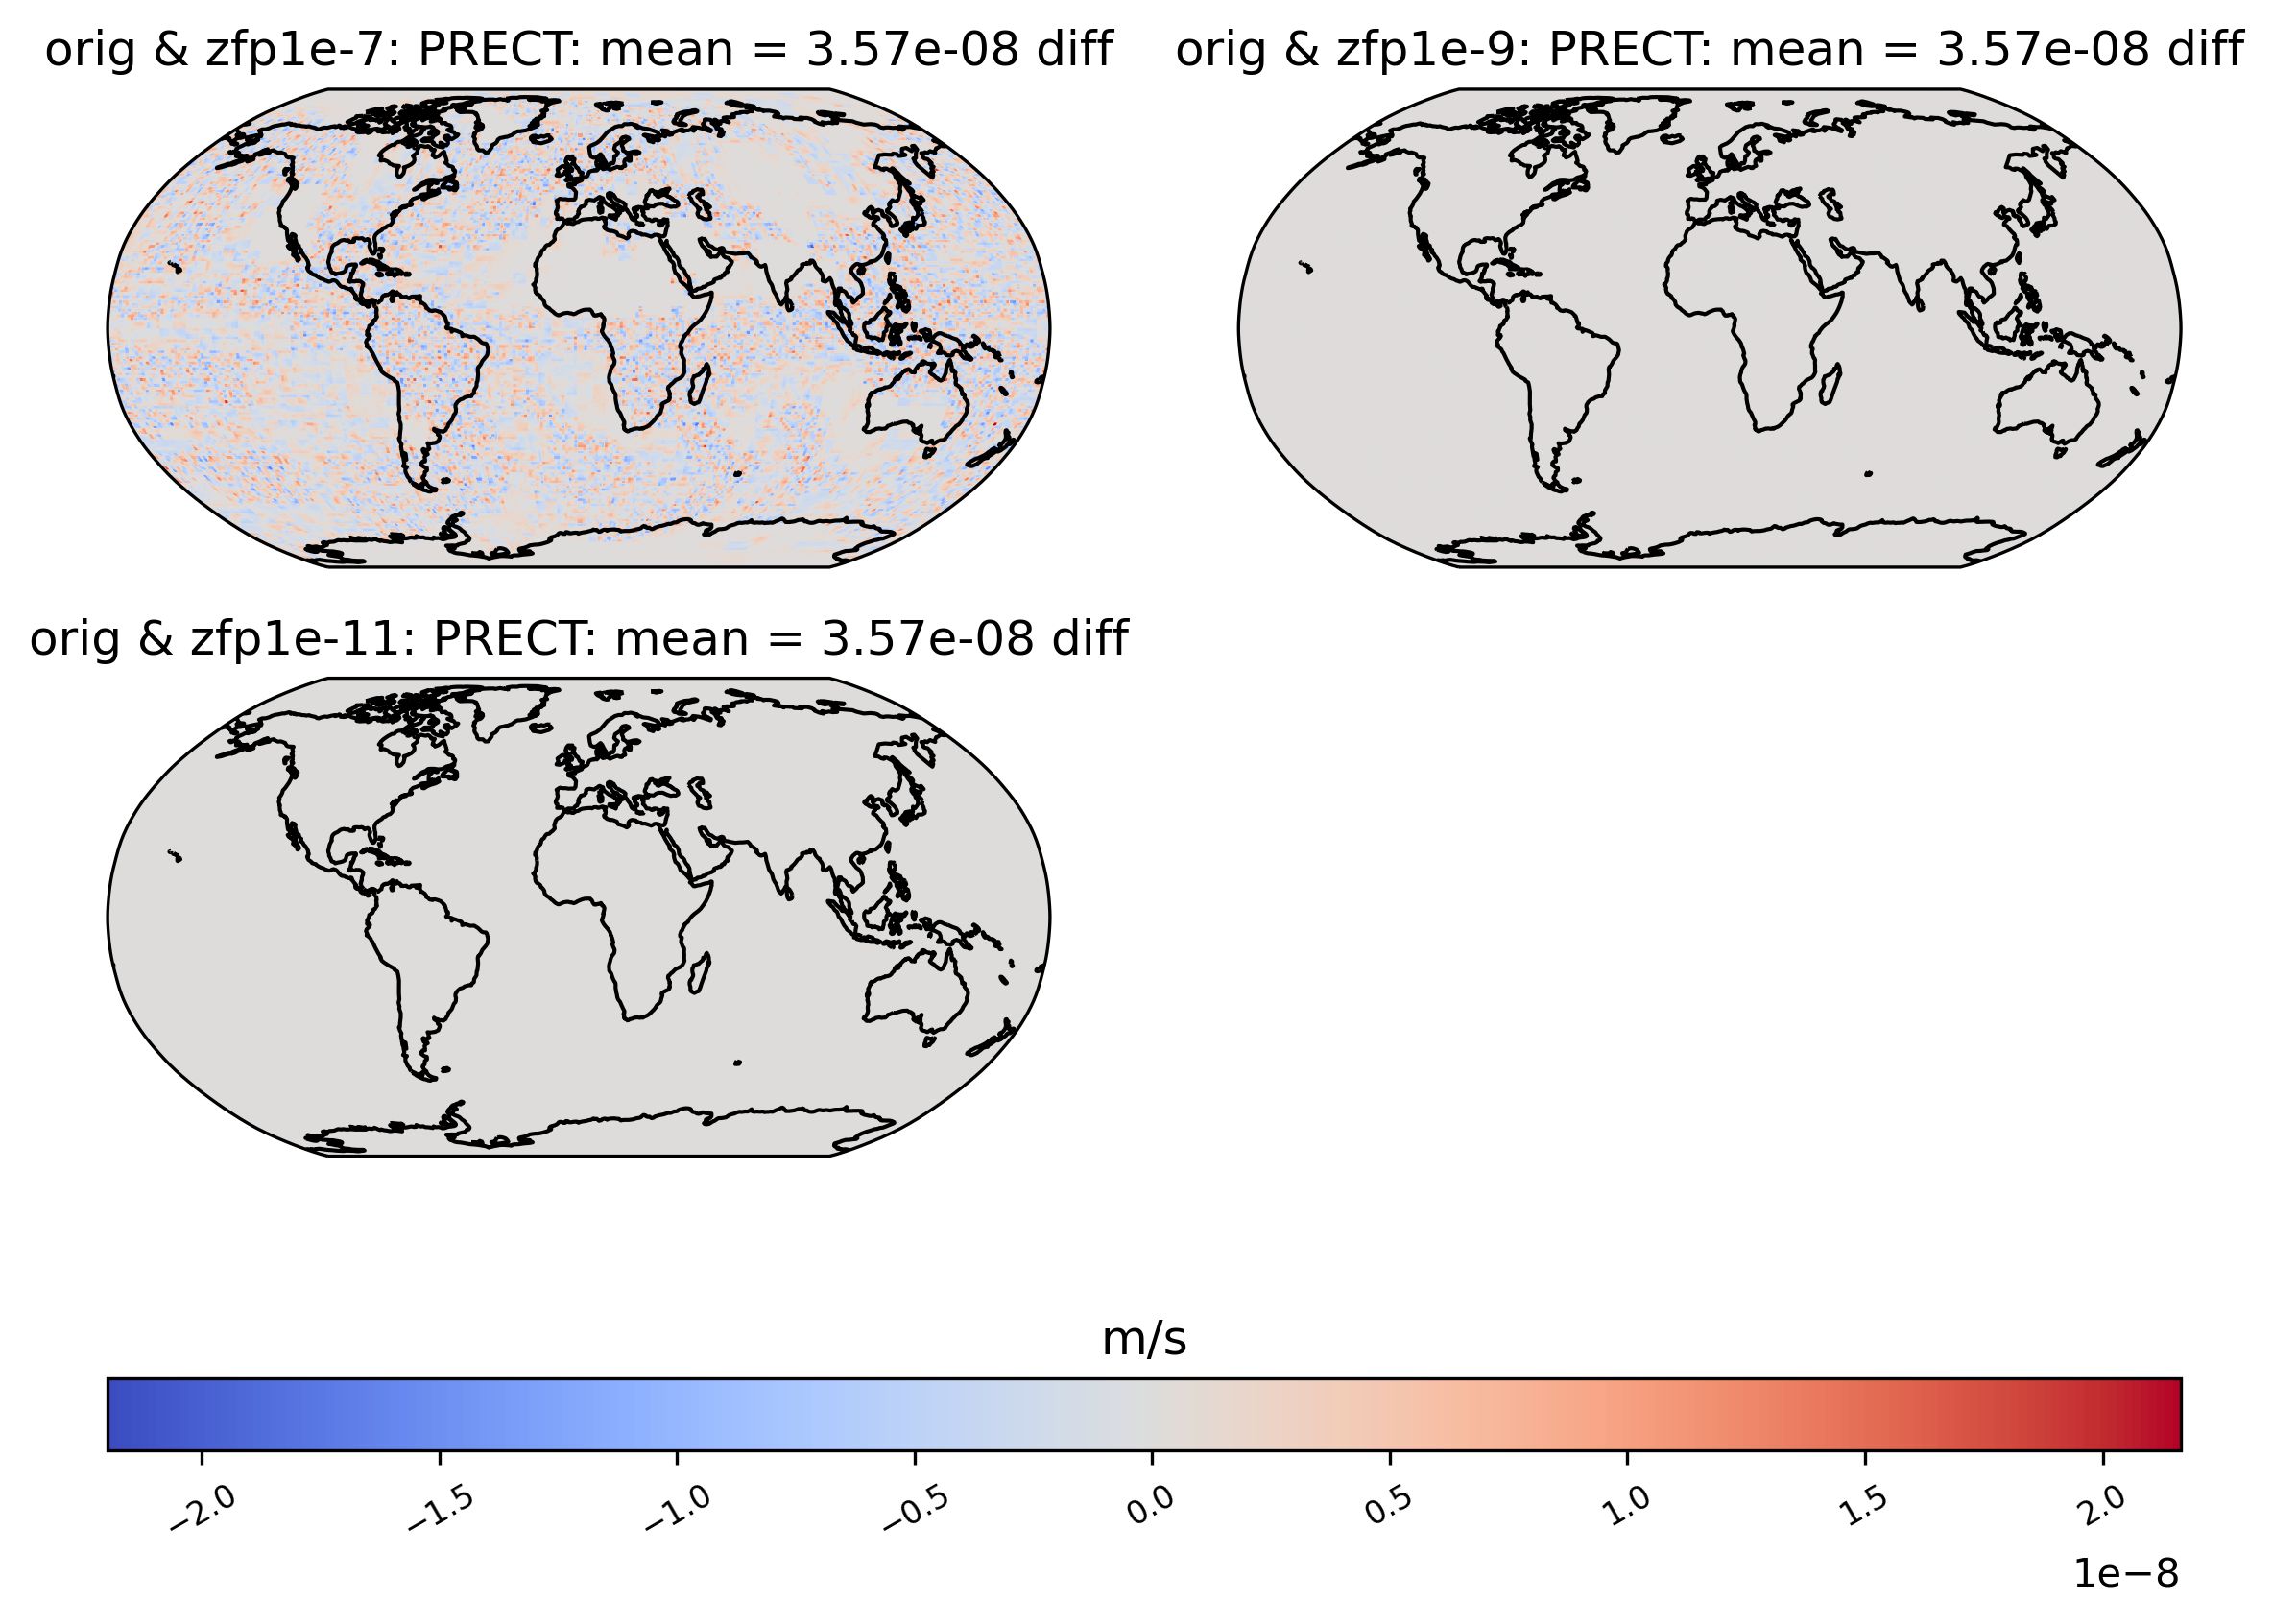

In [224]:
ldcpy.plot(
    prect_col,
    "PRECT",
    sets=["orig", "zfp1e-7", "zfp1e-9", "zfp1e-11"],
    calc="mean",
    calc_type="diff", start = 10, end = 10
)

In [291]:
tso = ts_col.TS.sel(collection="orig").isel(time=10)
tsz1 = ts_col.TS.sel(collection="zfp1.0").isel(time=10)
tszm1 = ts_col.TS.sel(collection="zfp1e-1").isel(time=10)
tszm3 = ts_col.TS.sel(collection="zfp1e-3").isel(time=10)

so_d = tso.data.compute()
tsz_d = tsz1.data.compute()
tszm1_d = tszm1.data.compute()
tszm3_d = tszm3.data.compute()


In [293]:
dm = ldcpy.calcs.Diffcalcs(tso, tsz, "cam-fv")
ssim_fp = dm.get_diff_calc('ssim_fp')
ssim_o = dm.get_diff_calc('ssim')
ssim_fp_orig = dm.get_diff_calc('ssim_fp_orig')
ssim_fp_slow = dm.get_diff_calc('ssim_fp_slow')
ssim_fp_orig_exp = dm.get_diff_calc('ssim_fp_orig_exp')

print("image ssim = ", ssim_o)
print("dssim = ", ssim_fp)
print("dssim-exp = ", ssim_fp_slow)
print("sf-ssim = ", ssim_fp_orig)
print("sf-ssim-exp = ", ssim_fp_orig_exp)


image ssim =  0.9983252376607851
dssim =  0.9812486243412292
dssim-exp =  0.9956698982915116
sf-ssim =  0.9996626069027063
sf-ssim-exp =  0.9996626069027063


In [294]:
dm1 = ldcpy.calcs.Diffcalcs(tso, tszm1, "cam-fv")
ssim_fp = dm1.get_diff_calc('ssim_fp')
ssim_o = dm1.get_diff_calc('ssim')
ssim_fp_orig = dm1.get_diff_calc('ssim_fp_orig')
ssim_fp_slow = dm1.get_diff_calc('ssim_fp_slow')
ssim_fp_orig_exp = dm1.get_diff_calc('ssim_fp_orig_exp')

print("image ssim = ", ssim_o)
print("dssim = ", ssim_fp)
print("dssim-exp = ", ssim_fp_slow)
print("sf-ssim = ", ssim_fp_orig)
print("sf-ssim-exp = ", ssim_fp_orig_exp)


image ssim =  0.999857068346985
dssim =  0.9985703710238755
dssim-exp =  0.9999661587751013
sf-ssim =  0.9999980253638591
sf-ssim-exp =  0.9999980253638591


In [31]:
import skimage.io
import skimage.metrics
from skimage.metrics import structural_similarity as ssim

#read in images and get SSIM
filename_1 = "im1.png"
filename_2 = "im2.png"
img1 = skimage.io.imread(filename_1)
img2 = skimage.io.imread(filename_2)
img1_n = img1[:,:,:3]
img2_n= img2[:,:,:3]

In [32]:
 s, ssim_mat = ssim(
                        img1_n,
                        img2_n,
                        multichannel=True,
                        gaussian_weights=True,
                        use_sample_covariance=False,
                        full=True,
                    )
print(s)

0.9983252376607851


In [45]:
import matplotlib.image
read_img = matplotlib.image.imread('im1.png')
p = read_img[:,:,:3]

In [61]:
import numpy as np
np.max(img1_n - sc)

0.0

In [63]:
tso.shape

(192, 288)

In [62]:
sc.shape

(566, 951, 3)

In [72]:
from skimage.color import rgb2gray
gr_img1 = rgb2gray(img1_n)
gr_img1.shape

In [97]:
c = matplotlib.cm.get_cmap('binary')
c.N
clr = c.partition
clr

AttributeError: 'LinearSegmentedColormap' object has no attribute 'partition'

In [150]:
b = matplotlib.cm.get_cmap()
b.N

256

In [80]:
b.name

'viridis'

In [106]:
bc= b.colors
len(bc)

256

In [109]:
bc[0:10]

[[0.267004, 0.004874, 0.329415],
 [0.26851, 0.009605, 0.335427],
 [0.269944, 0.014625, 0.341379],
 [0.271305, 0.019942, 0.347269],
 [0.272594, 0.025563, 0.353093],
 [0.273809, 0.031497, 0.358853],
 [0.274952, 0.037752, 0.364543],
 [0.276022, 0.044167, 0.370164],
 [0.277018, 0.050344, 0.375715],
 [0.277941, 0.056324, 0.381191]]

In [147]:
data = 10
b(258)

(0.993248, 0.906157, 0.143936, 1.0)

In [123]:
#which bin!
bins = np.linspace(0.0, 1.0, 257)


In [121]:
h,e = np.histogram(data, 256, range=(0,1))
len(e)

257

In [128]:
np.where(h==1)

(array([25]),)

In [133]:
bc[25]

[0.282623, 0.140926, 0.457517]

In [165]:
#different grayscale schemes
g_common = [.3, .59, .11]
g_luma = [.21, .72, .072]
g_bt = [.299, .587, .114]

In [ ]:
np.dot(bc, g_luma)

In [98]:
import numpy as np
from matplotlib import cm, colors
values = np.linspace(1.0, 2.0, 10)
norm = colors.Normalize(vmin=1.0, vmax=2.0, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Greys_r)
for value in values:
   print("%.2f" % value, "=",
      "red:%.2f" % mapper.to_rgba(value)[0],
      "green:%.2f" % mapper.to_rgba(value)[1],
      "blue:%.2f" % mapper.to_rgba(value)[2])


1.00 = red:0.00 green:0.00 blue:0.00
1.11 = red:0.13 green:0.13 blue:0.13
1.22 = red:0.28 green:0.28 blue:0.28
1.33 = red:0.41 green:0.41 blue:0.41
1.44 = red:0.53 green:0.53 blue:0.53
1.56 = red:0.66 green:0.66 blue:0.66
1.67 = red:0.78 green:0.78 blue:0.78
1.78 = red:0.87 green:0.87 blue:0.87
1.89 = red:0.95 green:0.95 blue:0.95
2.00 = red:1.00 green:1.00 blue:1.00


In [103]:
cm.Greys_r.N

256

In [ ]:
from skimage.metrics import structural_similarity as ssim
maxr = max(tso_d.max(), tsz_d.max())
minr = min(tso_d.min(), tsz_d.min())
myrange = maxr-minr
sog = ssim(tso_d, tsz_d, K1=1e-15, K2 = 1e-15, multichannel=False, data_range=myrange, gaussian_weights=True,use_sample_covariance=False)
sog

In [183]:
tt = tso.compute()
t1 = tt[0,:].data
sc_max= t1.max()
sc_min = t1.min()
r = sc_max-sc_min
sc_t1 = (t1-sc_min)/r
sc_t1

array([0.22571947, 0.8237571 , 0.8472217 , 0.85637665, 0.22430642,
       0.24296461, 0.2279883 , 0.29730725, 0.23230705, 0.20836484,
       0.8331807 , 0.45815587, 0.21326075, 0.21515146, 0.22881423,
       0.8684771 , 0.4550611 , 0.9997512 , 0.21950006, 0.80481035,
       0.24013852, 0.22028619, 0.85511285, 0.8839012 , 0.23716316,
       0.82906103, 0.20875293, 0.2308741 , 0.19896111, 0.        ,
       0.99657685, 0.7887294 , 0.18957728, 0.1959559 , 0.4518071 ,
       0.6978267 , 0.9704852 , 0.02073797, 0.21716157, 0.8368228 ,
       0.8687358 , 0.96694267, 0.23147117, 0.7843112 , 0.231302  ,
       0.21045457, 0.22573936, 0.98057556, 0.21457429, 0.7794949 ,
       0.1974187 , 0.21355928, 0.66314733, 0.8435995 , 0.22625682,
       0.8858616 , 0.8379672 , 0.00665725, 0.8457688 , 0.8399176 ,
       0.22162959, 0.8372308 , 0.21817657, 0.21228555, 0.46720138,
       0.7828086 , 0.23692434, 0.22068423, 0.2170521 , 0.21964933,
       0.79600364, 0.21556939, 0.22097282, 0.7812761 , 0.21996

In [209]:
pp = np.round(sc_t1*255)
ll = pp/255

In [210]:
zz = np.linspace(0.0, 1.0, 3000)
zz_q = np.round(zz*255)/255

In [211]:
a = np.unique(zz_q)
len(a)
bb = np.linspace(0.0, 1.0, 256)

In [227]:
pp.max()

255.0

In [243]:
len(bb)
bb

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

In [241]:
h,e = np.histogram(ll, 256, range=(0,1))
len(h)

256

<BarContainer object of 256 artists>

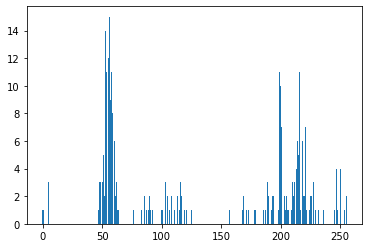

In [250]:
b = range(0,256)
matplotlib.pyplot.bar(b,h)

In [253]:
precto = prect_col.PRECT.sel(collection="orig").isel(time=10)
prectz = prect_col.PRECT.sel(collection="zfp1e-9").isel(time=10)
precto_d = precto.data.compute()
prectz_d = prectz.data.compute()

In [271]:
#p1 = precto_d[0,:]
p1 = np.ravel(precto_d)
psc_max= p1.max()
psc_min = p1.min()
pr = psc_max-psc_min
if pr  > 0:
    psc_p1 = (p1-psc_min)/pr
else:
    if psc_max > 0:
        psc_p1 = p1/psc_max
    else:
        psc_p1 = p1
print("max = ", psc_max)
print("min = ",  psc_min)
print("pr = ", pr)
psc_p1

max =  2.2157103e-06
min =  -1.2220852e-24
pr =  2.2157103e-06


array([2.7724659e-06, 2.7724659e-06, 2.7724659e-06, ..., 1.2059148e-04,
       1.2059148e-04, 1.2059148e-04], dtype=float32)

In [268]:
pr = np.round(psc_p1*255)
llp = pr/255

In [273]:
pr

2.2157103e-06

<BarContainer object of 256 artists>

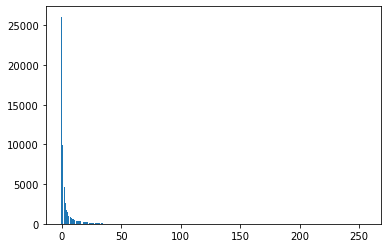

In [286]:
ric= np.round(psc_p1*255)
ric.max()
ricp = ric/255 
h,e = np.histogram(ricp, 256, range=(0,1))
b = range(0,256)
matplotlib.pyplot.bar(b,h)

In [287]:
h

array([26081,  9924,  4629,  2638,  1800,  1443,  1045,   847,   718,
         650,   563,   517,   410,   398,   381,   330,   299,   267,
         229,   227,   191,   180,   167,   141,   119,   130,   103,
          75,    76,    52,    57,    44,    50,    38,    44,    31,
          29,    31,    25,    16,    18,    20,    17,    23,    16,
          15,     9,     5,    12,     5,     6,    11,     3,     5,
           7,     4,     5,     5,     3,     5,     5,     0,     2,
           3,     3,     1,     2,     2,     1,     0,     0,     1,
           3,     1,     0,     1,     0,     3,     0,     3,     1,
           1,     0,     2,     4,     2,     0,     0,     3,     2,
           2,     1,     4,     0,     0,     0,     1,     4,     1,
           2,     2,     0,     1,     0,     1,     1,     0,     0,
           1,     0,     1,     0,     1,     0,     1,     2,     0,
           1,     0,     1,     1,     1,     0,     0,     1,     1,
           1,     0,

In [ ]:
from skimage.metrics import structural_similarity as ssim
maxr = max(tso_d.max(), tsz_d.max())
minr = min(tso_d.min(), tsz_d.min())
myrange = maxr-minr
sc_o = (tso_d - minr)/myrange
sc_z = (tsz_d - minr)/myrange
sog = ssim(sc_o, sc_z, K1=1e-15, K2 = 1e-15, multichannel=False, data_range=1.0, gaussian_weights=True,use_sample_covariance=False)
sog

In [ ]:
to = sc_o*255
tz = sc_z*255
ro = np.round(to)/255
rz = np.round(tz)/255
test = ssim(to, tz, K1=1e-15, K2 = 1e-15, multichannel=False, data_range=1.0, gaussian_weights=True,use_sample_covariance=False)
test